Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados e Análise Exploratória - Resumo Estatístico

In [2]:
df = pd.read_csv('dataset.csv')

In [5]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
# Verificando se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [11]:
# Resumo estatístico do dataset 
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [14]:
# Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

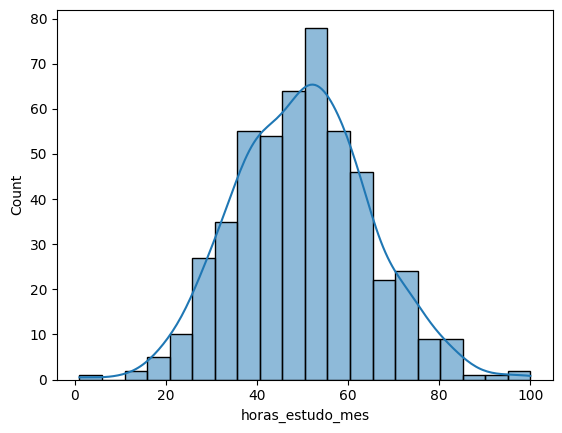

In [15]:
# Histograma da variável preditora
sns.histplot(data = df, x = 'horas_estudo_mes', kde = True )

### Preparação dos Dados

In [20]:
X = np.array(df['horas_estudo_mes'])

In [22]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [23]:
# Prepara a variável alvo
y = df['salario']

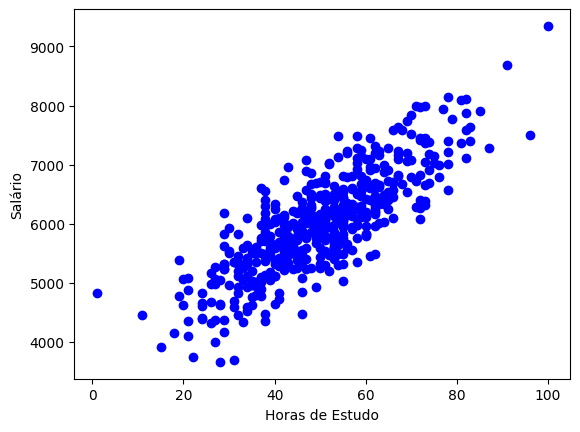

In [39]:
# Gráfico de dispersão entre X e y para melhor entendimento dos dados
plt.scatter(X, y, color = 'blue')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.show()

In [25]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
X_treino.shape

(400, 1)

In [33]:
X_teste.shape

(100, 1)

In [34]:
y_treino.shape

(400,)

In [35]:
y_teste.shape

(100,)

## Modelagem Preditiva (Machine Learning)


In [37]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

In [38]:
modelo.fit(X_treino, y_treino)

LinearRegression()

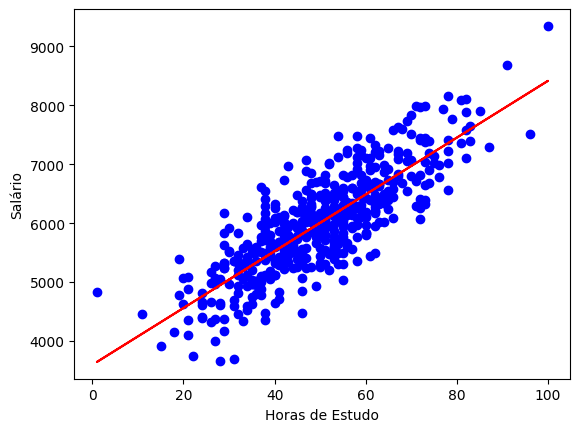

In [40]:
# Visualiza a reta de regressão linear e os dados reais usados no treinamento
plt.scatter(X, y, color = 'blue')
plt.plot(X, modelo.predict(X), color = 'red')
plt.xlabel('Horas de Estudo')
plt.ylabel('Salário')
plt.show()

In [43]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f'R^2: {score:.2f}')

R^2: 0.59


In [44]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727536

In [45]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

## Deploy do Modelo
Usarei o modelo para prever o salário com base nas horas de estudo.

In [47]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[45]])
# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Estudando cerca de', horas_estudo_novo, 'horas por mês seu salário pode ser igual a', salario_previsto)

Estudando cerca de [[45]] horas por mês seu salário pode ser igual a [5764.96709909]


In [48]:
# Define um novo outro valor para horas de estudo
horas_estudo_novo = np.array([[67]])
# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Estudando cerca de', horas_estudo_novo, 'horas por mês seu salário pode ser igual a', salario_previsto)

Estudando cerca de [[67]] horas por mês seu salário pode ser igual a [6824.96786006]


In [49]:
# Define um novo outro valor para horas de estudo
horas_estudo_novo = np.array([[87]])
# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f'Estudando cerca de', horas_estudo_novo, 'horas por mês seu salário pode ser igual a', salario_previsto)

Estudando cerca de [[87]] horas por mês seu salário pode ser igual a [7788.60491549]
